# <span style="color:blue">Analysis of Movie Durations (on Netflix) Over Time</span> 
#### By Joseph Vellappally

Dataset contains movies and shows from 1925 to 2021. The dataset is collected from kaggle.com. 
In this project, we try to find out if the length/duration of movies has decreased over the years.

We will process and analyze the data using Pandas library and then visualize with maplotlib.

In [364]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation

In [365]:
netflix_df = pd.read_csv("netflix_titles.csv")
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [366]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [367]:
# Editing column names and splitting duration column to extract only the numeric value
netflix_df=netflix_df.rename(columns={'listed_in':'genre'})

netflix_df[['duration','duration extra text']]=netflix_df['duration'].str.split(' ', 1,expand=True)

netflix_df['duration']=pd.to_numeric(netflix_df['duration'])

In [368]:
# Subset the DataFrame for type "Movie"
netflix_df_movies = netflix_df[netflix_df['type']=='Movie']

In [369]:
# Select only the columns of interest
netflix_movies_subset = netflix_df_movies[['title','country','genre','release_year','duration']]

In [370]:
netflix_movies_subset.head(10)

,title,country,genre,release_year,duration
0,Dick Johnson Is Dead,United States,Documentaries,2020,90.0
6,My Little Pony: A New Generation,NaN,Children & Family Movies,2021,91.0
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","Dramas, Independent Movies, International Movies",1993,125.0
9,The Starling,United States,"Comedies, Dramas",2021,104.0
12,Je Suis Karl,"Germany, Czech Republic","Dramas, International Movies",2021,127.0
13,Confessions of an Invisible Girl,NaN,"Children & Family Movies, Comedies",2021,91.0
16,Europe's Most Dangerous Man: Otto Skorzeny in ...,NaN,"Documentaries, International Movies",2020,67.0
18,Intrusion,NaN,Thrillers,2021,94.0
22,Avvai Shanmughi,NaN,"Comedies, International Movies",1996,161.0
23,Go! Go! Cory Carson: Chrissy Takes the Wheel,NaN,Children & Family Movies,2021,61.0


In [371]:
netflix_movies_subset.tail(10)

,title,country,genre,release_year,duration
8792,Young Tiger,Hong Kong,"Action & Adventure, International Movies",1973,81.0
8793,"Yours, Mine and Ours",United States,"Children & Family Movies, Comedies",2005,88.0
8794,اشتباك,"Egypt, France","Dramas, Independent Movies, International Movies",2016,98.0
8798,Zed Plus,India,"Comedies, Dramas, International Movies",2014,131.0
8799,Zenda,India,"Dramas, International Movies",2009,120.0
8801,Zinzana,"United Arab Emirates, Jordan","Dramas, International Movies, Thrillers",2015,96.0
8802,Zodiac,United States,"Cult Movies, Dramas, Thrillers",2007,158.0
8804,Zombieland,United States,"Comedies, Horror Movies",2009,88.0
8805,Zoom,United States,"Children & Family Movies, Comedies",2006,88.0
8806,Zubaan,India,"Dramas, International Movies, Music & Musicals",2015,111.0


## Visualizations

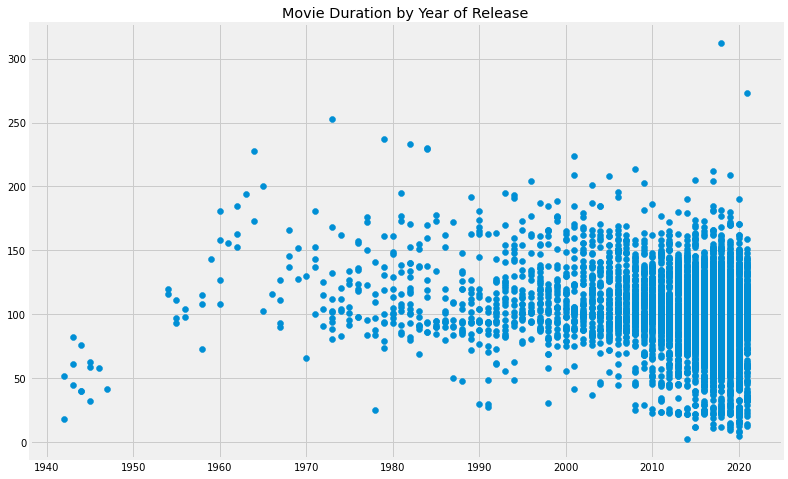

In [372]:
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_subset['release_year'], netflix_movies_subset['duration'])

plt.title('Movie Duration by Year of Release')
plt.show()

We see that there are a lot of movies that are shorter than an hour (especially after 2000).

We dig a little deeper to see what genre these movies are.

In [373]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_subset[netflix_movies_subset['duration']<60]

short_movies.head(30)

,title,country,genre,release_year,duration
45,My Heroes Were Cowboys,NaN,Documentaries,2021,23.0
71,A StoryBots Space Adventure,NaN,Children & Family Movies,2021,13.0
77,Little Singham - Black Shadow,NaN,"Children & Family Movies, Comedies",2021,48.0
279,Monster Hunter: Legends of the Guild,"United States, Japan","Action & Adventure, Anime Features, Children &...",2021,59.0
470,Bridgerton - The Afterparty,NaN,Movies,2021,39.0
484,Lee Su-geun: The Sense Coach,NaN,Stand-Up Comedy,2021,46.0
495,Awon Boyz,NaN,"Documentaries, International Movies",2019,38.0
560,Audible,NaN,"Documentaries, Sports Movies",2021,39.0
694,Aziza,"Lebanon, Syria","Comedies, Dramas, Independent Movies",2019,13.0
695,Besieged Bread,NaN,"Dramas, International Movies",2015,12.0


We observe that most of movies less than an hour long fall into "Children", "Stand-Up", and "Documentaries".
We mark these genres in a different color and plot them so we can see their impact on the average movie durations.

In [374]:
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab,row in netflix_movies_subset.iterrows() :
    if row['genre'].find("Children")>=0 :
        colors.append("red")
    elif row['genre'].find("Documentaries")>=0 :
        colors.append("blue")
    elif row['genre'].find("Stand-Up")>=0 :
        colors.append("green")
    else:
        colors.append('black')
        
# Inspect the first 10 values in your list        
print(colors[:10])

['blue', 'red', 'black', 'black', 'black', 'red', 'blue', 'black', 'black', 'red']


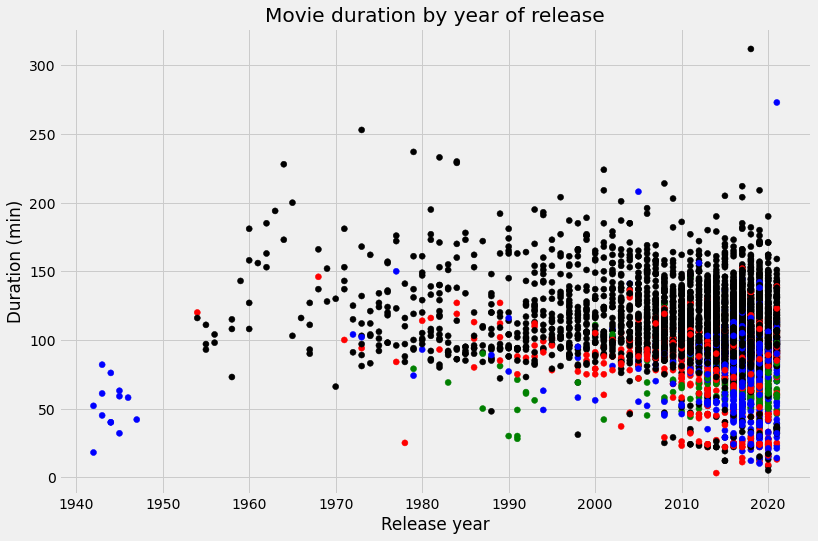

In [375]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_subset['release_year'], netflix_movies_subset['duration'], color=colors)

# Create a title and axis labels
plt.title('Movie duration by year of release')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.show()

# Show the plot
plt.show()

## Result: We see that movie durations has indeed not decreased over the years, but it was the increase of movies for children, documentaries, and stand-ups that resulted in a lower average of duration of the recent years. 